In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('events.csv')


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors = 'coerce')

df['event'] = df['event'].astype('category')

In [9]:
eventosConPais = df[['event', 'country', 'region', 'city']].dropna()
eventosConPais.head()

,event,country,region,city
1,visited site,Brazil,Pernambuco,Camaragibe
5,visited site,Brazil,Rio de Janeiro,Rio de Janeiro
9,visited site,Brazil,Rio de Janeiro,Rio de Janeiro
16,visited site,Brazil,Rio de Janeiro,Rio de Janeiro
45,visited site,Brazil,Sao Paulo,Ribeirão Preto


In [10]:
eventosConPais['event'].value_counts()

#El unico evento que guarda datos sobre la ubicacion de usuarios es una visita al sitio

visited site         87378
viewed product           0
staticpage               0
searched products        0
search engine hit        0
lead                     0
generic listing          0
conversion               0
checkout                 0
brand listing            0
ad campaign hit          0
Name: event, dtype: int64

In [17]:
eventosConPais['country'].value_counts()

#La empresa es ampliamente mas grande en Brasil que en cualquier otro pais

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
France                   13
Netherlands              13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Romania                   7
Portugal                  7
Italy                     7
Guadeloupe                6
Dominican Republic        6
Russia                    6
Germany                   5
Paraguay                  4
Colombia                  4
Bangladesh                4
Switzerland               3
India                     2
Morocco                   2
Angola                    2
South Africa              1
Mexico                    1
Uruguay                   1
Spain                     1
Ireland                   1
Israel                    1
Sri Lanka                 1
Turkey                    1
Philippines               1
Uzbekistan          

Text(0,0.5,'Cantidad de visitas')

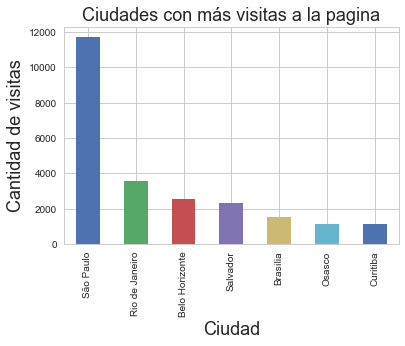

In [47]:
#Elimino los eventos con ciudad desconocida

eventosFiltradosPorCiudad = eventosConPais.loc[eventosConPais['city'] != 'Unknown', :]

plotCiudades = eventosFiltradosPorCiudad['city'].value_counts().head(7).plot(kind = 'bar')

plotCiudades.set_title("Ciudades con más visitas a la pagina", fontsize=18)
plotCiudades.set_xlabel("Ciudad",fontsize=18)
plotCiudades.set_ylabel("Cantidad de visitas", fontsize=18)

#La ciudad con más trafico en la pagina es Sao Paulo por un margen grande